In [9]:
import pandas as pd
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [10]:
#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [102]:
df1= []
df11 = pd.DataFrame(df1)
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'fc8fe976-b35f-4c8e-8fed-def5b2c20729',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)


# Use this if you just want to keep it in a dataframe
df2 = pd.json_normalize(data['data'])
df2['Timestamp'] = pd.to_datetime('now')
# df11.append(df2, ignore_index=True)
# df11= pd.concat([df11, df2], ignore_index=True)

df11 = df11._append(df2,ignore_index=True)

In [103]:
df11

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11808,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19787678.00000,19787678.00000,False,NaN,1,NaN,NaN,None,2024-11-26T12:14:00.000Z,92560.74898,93829141757.97459,62.45760,0.04316,-5.70337,0.44578,37.97592,41.33731,54.11680,1831562296216.00000,57.93240,1943775728538.54004,None,2024-11-26T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-26 13:15:53.839644
1,1027,Ethereum,ETH,ethereum,9592,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120433832.86402,120433832.86402,True,NaN,2,NaN,NaN,None,2024-11-26T12:14:00.000Z,3334.29833,52633628843.83743,59.69250,0.19986,-4.26445,6.14861,35.01302,25.71664,31.79787,401562328329.43317,12.70910,401562328329.42999,None,2024-11-26T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-26 13:15:53.839644
2,825,Tether USDt,USDT,tether,105306,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,132744005559.75017,135944368167.21449,True,NaN,3,NaN,NaN,None,2024-11-26T12:14:00.000Z,0.99989,202257057886.10397,23.53540,0.00589,-0.08845,-0.05905,0.12052,-0.03089,-0.01901,132729873759.90161,4.19830,135929895659.82001,None,2024-11-26T12:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-26 13:15:53.839644
3,5426,Solana,SOL,solana,796,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,474829654.14208,589036071.23965,True,NaN,4,NaN,NaN,None,2024-11-26T12:14:00.000Z,228.71377,7963423697.78501,52.92580,0.36504,-9.09968,-7.17534,30.98222,46.37011,54.92465,108600081687.50752,3.44020,134720662232.22000,None,2024-11-26T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-26 13:15:53.839644
4,1839,BNB,BNB,bnb,2290,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144010182.36000,144010182.36000,False,NaN,5,NaN,NaN,None,2024-11-26T12:14:00.000Z,621.75788,2761198149.56111,0.39780,0.05696,-6.36404,0.26476,6.67242,1.97678,13.92234,89539465379.72565,2.83210,89539465379.73000,None,2024-11-26T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-26 13:15:53.839644
5,52,XRP,XRP,xrp,1438,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56998852241.00000,99986987365.00000,False,NaN,6,NaN,NaN,None,2024-11-26T12:14:00.000Z,1.34024,11339837689.06797,-9.49780,0.32723,-9.54299,21.30392,161.77331,127.94844,130.34133,76392275134.83627,2.42000,134024234052.71001,None,2024-11-26T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-26 13:15:53.839644
6,74,Dogecoin,DOGE,dogecoin,1112,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146951276383.70520,146951276383.70520,True,NaN,7,NaN,NaN,None,2024-11-26T12:14:00.000Z,0.37790,10557764812.84569,2.84710,-0.10087,-11.26143,-2.19206,174.46284,207.52083,273.86443,55533410871.10428,1.75760,55533410871.10000,None,2024-11-26T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-26 13:15:53.839644
7,3408,USDC,USDC,usd-coin,23344,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,38710590007.75312,38710590007.75312,False,NaN,8,NaN,NaN,None,2024-11-26T12:14:00.000Z,0.99987,15745225766.37170,63.26490,0.00189,0.00005,-0.00593,0.00507,-0.01249,-0.00625,38705693588.85126,1.22610,38705693588.85000,None,2024-11-26T12:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36

In [70]:
# df = []
def api_runner():
    df = []
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'fc8fe976-b35f-4c8e-8fed-def5b2c20729',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df.append(df2)
    
    return df


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [72]:
aa = api_runner()

In [16]:
import os 
from time import time
from time import sleep

for i in range(5):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

NameError: name 'df' is not defined

In [106]:
df11.head(2)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11808,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19787678.00000,19787678.00000,False,NaN,1,NaN,NaN,None,2024-11-26T12:14:00.000Z,92560.74898,93829141757.97459,62.45760,0.04316,-5.70337,0.44578,37.97592,41.33731,54.11680,1831562296216.00000,57.93240,1943775728538.54004,None,2024-11-26T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-26 13:15:53.839644
1,1027,Ethereum,ETH,ethereum,9592,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120433832.86402,120433832.86402,True,NaN,2,NaN,NaN,None,2024-11-26T12:14:00.000Z,3334.29833,52633628843.83743,59.69250,0.19986,-4.26445,6.14861,35.01302,25.71664,31.79787,401562328329.43317,12.70910,401562328329.42999,None,2024-11-26T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-26 13:15:53.839644


In [104]:
df3 = df11.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.04316,-5.70337,0.44578,37.97592,41.33731,54.11680
Ethereum,0.19986,-4.26445,6.14861,35.01302,25.71664,31.79787
Tether USDt,0.00589,-0.08845,-0.05905,0.12052,-0.03089,-0.01901
Solana,0.36504,-9.09968,-7.17534,30.98222,46.37011,54.92465
BNB,0.05696,-6.36404,0.26476,6.67242,1.97678,13.92234
XRP,0.32723,-9.54299,21.30392,161.77331,127.94844,130.34133
Dogecoin,-0.10087,-11.26143,-2.19206,174.46284,207.52083,273.86443
USDC,0.00189,0.00005,-0.00593,0.00507,-0.01249,-0.00625
Cardano,-0.46961,-13.81299,22.29400,171.45741,125.25464,152.92791


In [107]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.04316
             quote.USD.percent_change_24h    -5.70337
             quote.USD.percent_change_7d      0.44578
             quote.USD.percent_change_30d    37.97592
             quote.USD.percent_change_60d    41.33731
             quote.USD.percent_change_90d    54.11680
Ethereum     quote.USD.percent_change_1h      0.19986
             quote.USD.percent_change_24h    -4.26445
             quote.USD.percent_change_7d      6.14861
             quote.USD.percent_change_30d    35.01302
             quote.USD.percent_change_60d    25.71664
             quote.USD.percent_change_90d    31.79787
Tether USDt  quote.USD.percent_change_1h      0.00589
             quote.USD.percent_change_24h    -0.08845
             quote.USD.percent_change_7d     -0.05905
             quote.USD.percent_change_30d     0.12052
             quote.USD.percent_change_60d    -0.03089
             quote.USD.percent_change_90

In [108]:
type(df4)

pandas.core.series.Series

In [109]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.04316
            quote.USD.percent_change_24h  -5.70337
            quote.USD.percent_change_7d    0.44578
            quote.USD.percent_change_30d  37.97592
            quote.USD.percent_change_60d  41.33731
            quote.USD.percent_change_90d  54.11680
Ethereum    quote.USD.percent_change_1h    0.19986
            quote.USD.percent_change_24h  -4.26445
            quote.USD.percent_change_7d    6.14861
            quote.USD.percent_change_30d  35.01302
            quote.USD.percent_change_60d  25.71664
            quote.USD.percent_change_90d  31.79787
Tether USDt quote.USD.percent_change_1h    0.00589
            quote.USD.percent_change_24h  -0.08845
            quote.USD.percent_change_7d   -0.05905
            quote.USD.percent_change_30d   0.12052
            quote.USD.percent_change_60d  -0.03089
            quote.USD.percent_change_90d  -0.01901
Solana      quote.USD.percent_change_1h    0.36504
            quote.USD.percent_change_24h  -9.09968
            quote.USD.percent_change_7d   -7.17534
            quote.USD.percent_change_30d  30.98222
            quote.USD.percent_change_60d  46.37011
            quote.USD.percent_change_90d  54.92465
BNB         quote.USD.percent_change_1h    0.05696
            quote.USD.percent_change_24h  -6.36404
            quote.USD.percent_change_7d    0.26476
            quote.USD.percent_change_30d   6.67242
            quote.USD.percent_change_60d   1.97678
            quote.USD.percent_change_90d  13.92234
XRP         quote.USD.percent_change_1h    0.32723
            quote.USD.percent_change_24h  -9.54299
            quote.USD.percent_change_7d   21.30392
            quote.USD.percent_change_30d 161.77331
            quote.USD.percent_change_60d 127.94844
            quote.USD.percent_change_90d 130.34133
Dogecoin    quote.USD.percent_change_1h   -0.10087
            quote.USD.percent_change_24h -11.26143
            quote.USD.percent_change_7d   -2.19206
            quote.USD.percent_change_30d 174.46284
            quote.USD.percent_change_60d 207.52083
            quote.USD.percent_change_90d 273.86443
USDC        quote.USD.percent_change_1h    0.00189
            quote.USD.percent_change_24h   0.00005
            quote.USD.percent_change_7d   -0.00593
            quote.USD.percent_change_30d   0.00507
            quote.USD.percent_change_60d  -0.01249
            quote.USD.percent_change_90d  -0.00625
Cardano     quote.USD.percent_change_1h   -0.46961
            quote.USD.percent_change_24h -13.81299
            quote.USD.percent_change_7d   22.29400
            quote.USD.percent_change_30d 171.45741
            quote.USD.percent_change_60d 125.25464
            quote.USD.percent_change_90d 152.92791
Avalanche   quote.USD.percent_change_1h    2.50507
            quote.USD.percent_change_24h -10.92005
            quote.USD.percent_change_7d   15.33195
            quote.USD.percent_change_30d  60.29893
            quote.USD.percent_change_60d  36.02160
            quote.USD.percent_change_90d  64.11640
TRON        quote.USD.percent_change_1h   -1.05773
            quote.USD.percent_change_24h  -9.97271
            quote.USD.percent_change_7d   -7.65736
            quote.USD.percent_change_30d  14.46212
            quote.USD.percent_change_60d  22.32465
            quote.USD.percent_change_90d  18.83306
Toncoin     quote.USD.percent_change_1h   -0.39833
            quote.USD.percent_change_24h  -5.90851
            quote.USD.percent_change_7d    4.05724
            quote.USD.percent_change_30d  18.83157
            quote.USD.percent_change_60d  -0.76316
            quote.USD.percent_change_90d   7.53230
Shiba Inu   quote.USD.percent_change_1h   -0.70161
            quote.USD.percent_change_24h  -7.56710
            quote.USD.percent_change_7d   -4.92540
            quote.USD.percent_change_30d  41.85511
            quote.USD.percent_change_60d  22.34172
            quo

In [116]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,values
0,0.04316
1,-5.70337
2,0.44578
3,37.97592
4,41.33731
5,54.11680
6,0.19986
7,-4.26445
8,6.14861
9,35.01302


In [119]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.04316
1,Bitcoin,quote.USD.percent_change_24h,-5.70337
2,Bitcoin,quote.USD.percent_change_7d,0.44578
3,Bitcoin,quote.USD.percent_change_30d,37.97592
4,Bitcoin,quote.USD.percent_change_60d,41.33731
5,Bitcoin,quote.USD.percent_change_90d,54.11680
6,Ethereum,quote.USD.percent_change_1h,0.19986
7,Ethereum,quote.USD.percent_change_24h,-4.26445
8,Ethereum,quote.USD.percent_change_7d,6.14861
9,Ethereum,quote.USD.percent_change_30d,35.01302


In [120]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.04316
1,Bitcoin,quote.USD.percent_change_24h,-5.70337
2,Bitcoin,quote.USD.percent_change_7d,0.44578
3,Bitcoin,quote.USD.percent_change_30d,37.97592
4,Bitcoin,quote.USD.percent_change_60d,41.33731
5,Bitcoin,quote.USD.percent_change_90d,54.11680
6,Ethereum,quote.USD.percent_change_1h,0.19986
7,Ethereum,quote.USD.percent_change_24h,-4.26445
8,Ethereum,quote.USD.percent_change_7d,6.14861
9,Ethereum,quote.USD.percent_change_30d,35.01302


In [121]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.04316
1,Bitcoin,24h,-5.70337
2,Bitcoin,7d,0.44578
3,Bitcoin,30d,37.97592
4,Bitcoin,60d,41.33731
5,Bitcoin,90d,54.11680
6,Ethereum,quote.USD.percent_change_1h,0.19986
7,Ethereum,24h,-4.26445
8,Ethereum,7d,6.14861
9,Ethereum,30d,35.01302


In [122]:

import seaborn as sns
import matplotlib.pyplot as plt

D:\Programy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


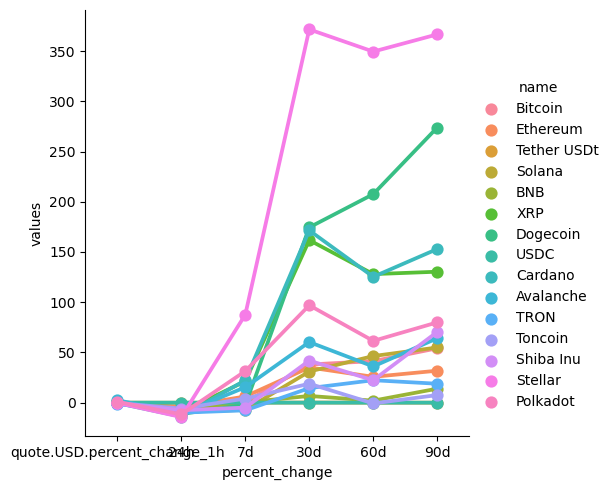

In [123]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [131]:
df11.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'Timestamp'],
      dtype='object')

In [132]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df11[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,92560.74898,2024-11-26 13:15:53.839644


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

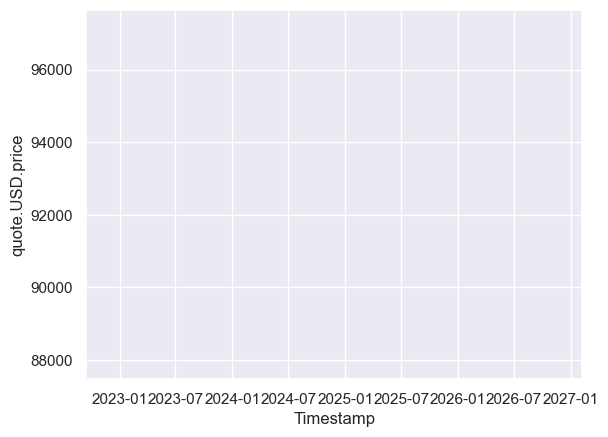

In [134]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)

In [99]:
import sys
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
